In [1]:
from fastai.vision import *

In [2]:
path = Path('/home/jupyter/workStuff/data/cars')

In [3]:
classes = ['Aventador', 'G63', 'Agera']

In [27]:
dest = path/classes[2]

In [12]:
imgurl = Path('/home/jupyter/workStuff/source/carclassifier')

In [32]:
# file = 'download (9)'

In [33]:
# download_images(imgurl/file, dest, max_pics = 500)

In [4]:
for c in classes:
    print(c)
    verify_images(path/c, delete = True, max_size = 500)

In [6]:
np.random.seed(40)

In [7]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct = 0.2, ds_tfms=get_transforms(), size =224, num_workers=4).normalize(imagenet_stats)

In [8]:
data.classes

['Agera', 'Aventador', 'G63']

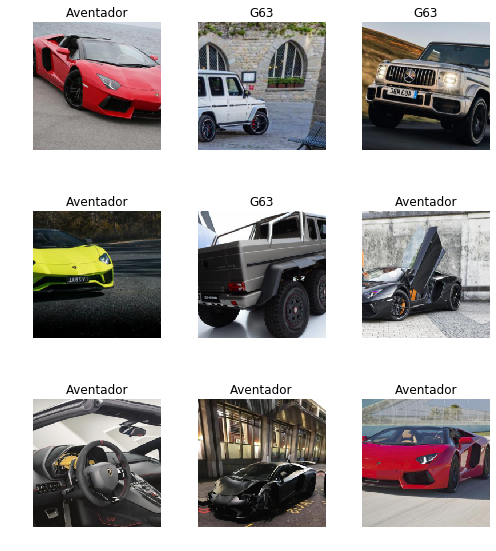

In [9]:
data.show_batch(rows=3, figsize=(7,8))

In [10]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Agera', 'Aventador', 'G63'], 3, 1384, 345)

In [11]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


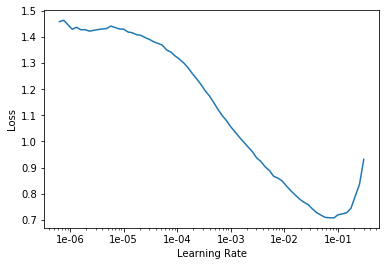

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(4, max_lr=slice(1e-3, 1e-2))

In [16]:
learn.save('stage_1')

In [17]:
learn.load('stage_1')

Learner(data=ImageDataBunch;

Train: LabelList (1384 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Agera,Agera,Agera,Agera,Agera
Path: /home/jupyter/workStuff/data/cars;

Valid: LabelList (345 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Agera,Aventador,G63,Aventador,Agera
Path: /home/jupyter/workStuff/data/cars;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentu

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

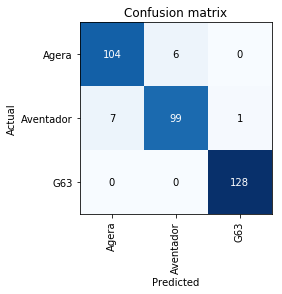

In [19]:
interp.plot_confusion_matrix()

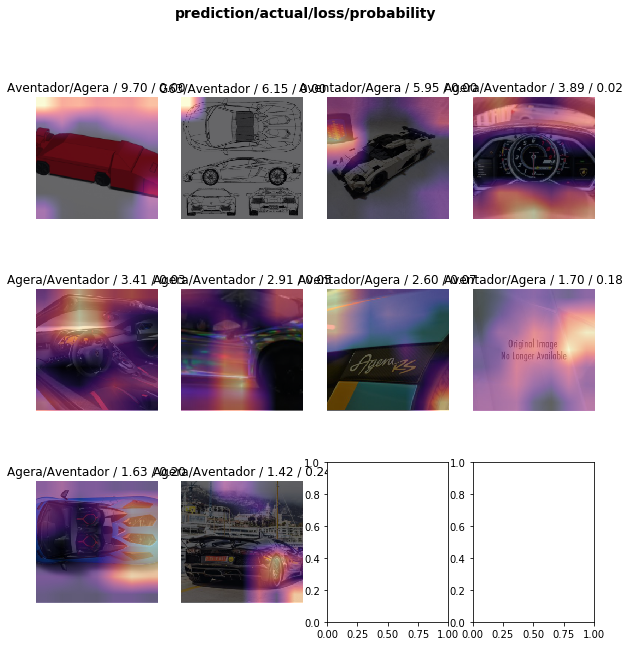

In [20]:
interp.plot_top_losses(10, figsize=(10,10))

In [22]:
interp.most_confused(min_val=2)

[('Aventador', 'Agera', 7), ('Agera', 'Aventador', 6)]

In [26]:
learn.export()

In [24]:
defaults.device = torch.device('cpu')

In [25]:
path

PosixPath('/home/jupyter/workStuff/data/cars')

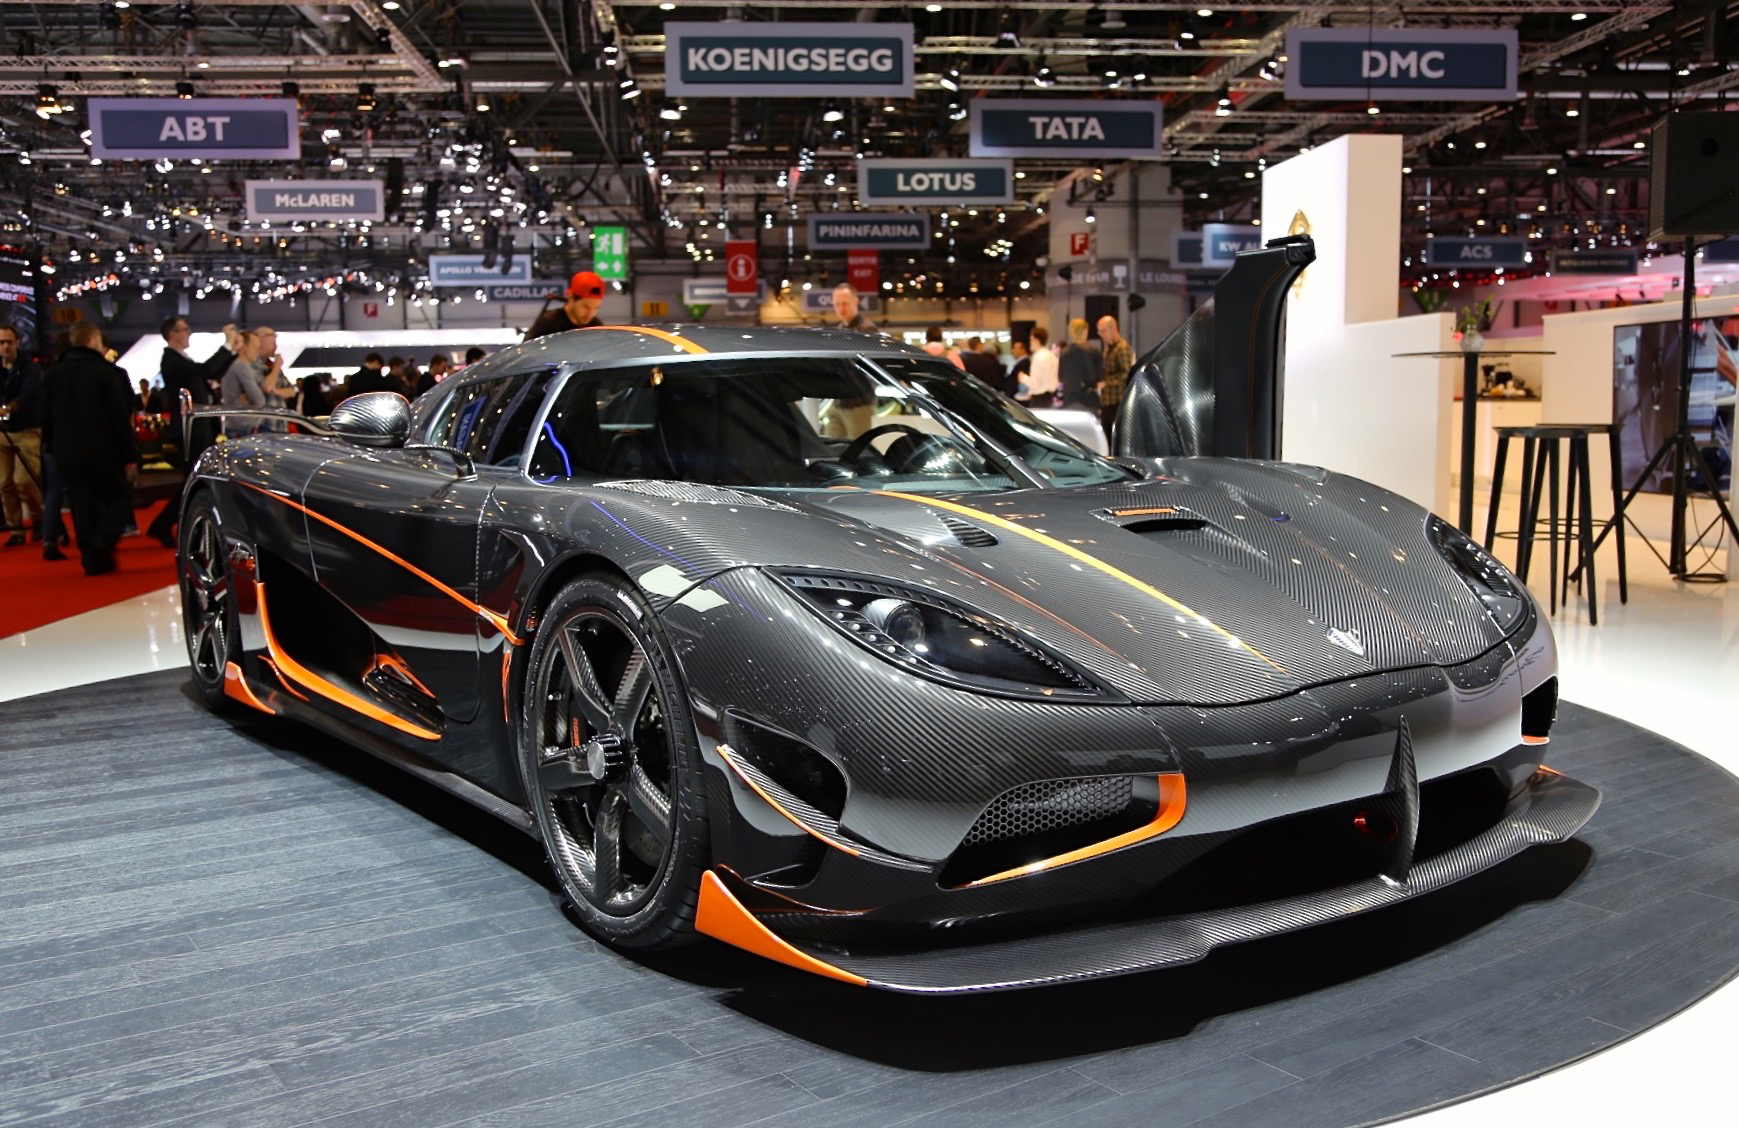

In [29]:
img = open_image(path/'koenigsegg-agera-rs_100502570_h.jpg')
img

In [30]:
pred_class, pred_ix, outputs= learn.predict(img)
pred_class

Category Agera